# How does follower count and state of origin influence overall engagement?(number of likes)

## Introduction

## Data Cleaning

In [18]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('hashtag_donaldtrump.csv', lineterminator='\n')

In [4]:
df.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121


In [5]:

df_final = df.sample(frac = 0.10)
df_final.shape

(97092, 21)

In [6]:
df_final.isnull().any(axis = 0)

created_at              False
tweet_id                False
tweet                   False
likes                   False
retweet_count           False
source                   True
user_id                 False
user_name                True
user_screen_name        False
user_description         True
user_join_date          False
user_followers_count    False
user_location            True
lat                      True
long                     True
city                     True
country                  True
continent                True
state                    True
state_code               True
collected_at            False
dtype: bool

In [7]:
df_final.duplicated().sum()

0

In [17]:

df_cleaned = df_final.dropna()
df_cleaned.shape

(19074, 21)

## Summary statistics

(0.0, 3000000.0)

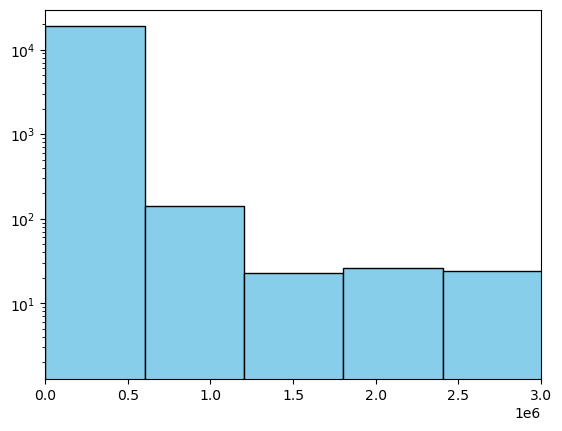

In [44]:
plt.hist(df_cleaned['user_followers_count'],log = True, bins = 20, edgecolor = 'black', color = 'skyblue')
plt.xlim([0,3000000])
#if we used linear scale, there would be only one bar (follower count between 0 to 5 500,000 followers).
# log scale spreads the distribution out

(0.0, 10000.0)

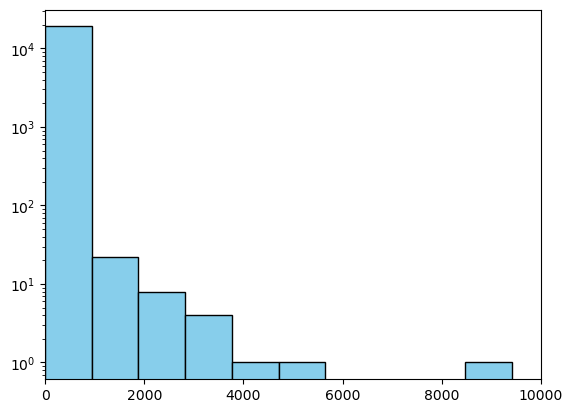

In [55]:
plt.hist(df_cleaned['likes'],log= True, edgecolor = 'black', color = 'skyblue')
plt.xlim([0,10000])
#used log-scale again for similar purposes.